In [1]:
from __future__ import division, print_function
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

from scipy import signal

from kid_readout.measurement.io import npy
from kid_readout.measurement import plot_basic
from kid_readout.analysis import detect_peaks
from kid_readout.analysis.resonator import find_resonators, lmfit_resonator

In [2]:
plot_directory = '/home/flanigan/temp/'

In [3]:
npd = npy.NumpyDirectory('/data/readout/2017-11-16_153318_scan.npd/')

In [4]:
npd.node_names()

['Scan0',
 'ADCSnap1',
 'ADCSnap2',
 'ADCSnap3',
 'ADCSnap4',
 'ADCSnap5',
 'ADCSnap6',
 'ADCSnap7',
 'ADCSnap8',
 'ADCSnap9',
 'ADCSnap10',
 'ADCSnap11',
 'ADCSnap12',
 'ADCSnap13']

# ADCSnap

In [5]:
snaps = [npd.read(name) for name in npd.node_names() if name.startswith('ADCSnap')]

In [6]:
[(snap.x.ptp(), snap.y.ptp()) for snap in snaps]

[(10.0, 219.0),
 (10.0, 161.0),
 (10.0, 127.0),
 (10.0, 98.0),
 (9.0, 67.0),
 (9.0, 53.0),
 (10.0, 52.0),
 (9.0, 95.0),
 (9.0, 113.0),
 (9.0, 128.0),
 (9.0, 199.0),
 (9.0, 191.0),
 (9.0, 229.0)]

In [7]:
[(snap.x.std(), snap.y.std()) for snap in snaps]

[(1.3440279784000999, 30.953432345416992),
 (1.3277560226413012, 23.961917500189198),
 (1.3457456451918151, 18.537758975493258),
 (1.3515173402860023, 14.347342178475753),
 (1.3412946402452683, 9.4854929452101455),
 (1.3240341688037207, 8.3377758884108655),
 (1.3151886059938085, 8.438683486871863),
 (1.3390619872191258, 11.559338771560135),
 (1.3518064201620734, 16.176596891119218),
 (1.3612692558881268, 20.796264408757992),
 (1.4022264351825999, 24.35029414193151),
 (1.3443628510476429, 30.157042101601672),
 (1.3593152789447458, 33.302305589617752)]

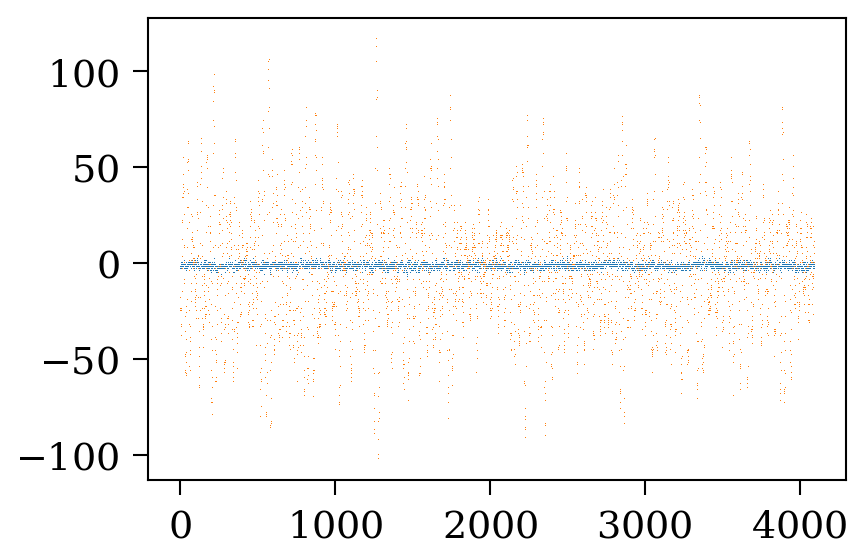

In [11]:
fig, ax = plt.subplots()
ax.plot(snaps[0].x, ',')
ax.plot(snaps[0].y, ',')

# Scan

In [8]:
scan = npd.Scan0

In [9]:
def remove_background(f, s21, amp_degree=4, phi_degree=4, weights=None):
    if weights is None:
        weights = np.abs(s21)**2
    amp_poly = np.polyfit(f, np.abs(s21), deg=amp_degree, w=weights)
    phi_poly = np.polyfit(f, np.unwrap(np.angle(s21)), deg=phi_degree, w=weights)
    return s21 / (np.polyval(amp_poly, f) * np.exp(1j * np.polyval(phi_poly, f)))

# Raw data

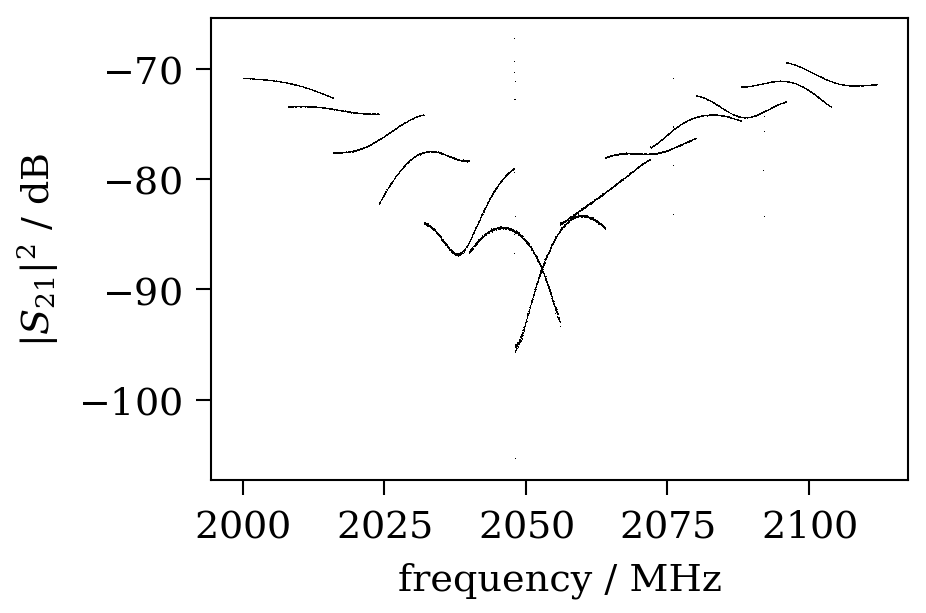

In [10]:
fig, ax = plt.subplots()
ax.set_xlabel('frequency / MHz', rotation='horizontal')
ax.set_ylabel('$|S_{21}|^2$ / dB', rotation='vertical')
ax.set_yscale('linear')
ax.set_yscale('linear')
for sa in scan.sweep_arrays:
    ax.plot(sa.frequency_MHz, 20 * np.log10(np.abs(sa.s21_point)), ',k')
ax.legend()
#ax.set_ylim()
#ax.set_xlim()
